In [3]:
from model import VGGEncoder, VGGDecoder, AdaIN_realign
from torch import nn
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.models import vgg19

In [4]:
T = transforms.Compose([
    transforms.Resize(512),
    transforms.ToTensor()
])

to_pil = transforms.ToPILImage()

enc = VGGEncoder(weight_path="pretrained-weights/vgg_normalised.pth")
dec = VGGDecoder(enc, weight_path="pretrained-weights/decoder.pth")

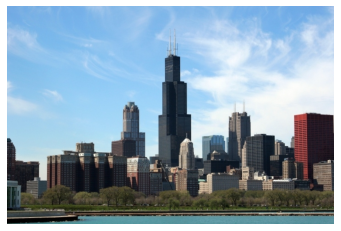

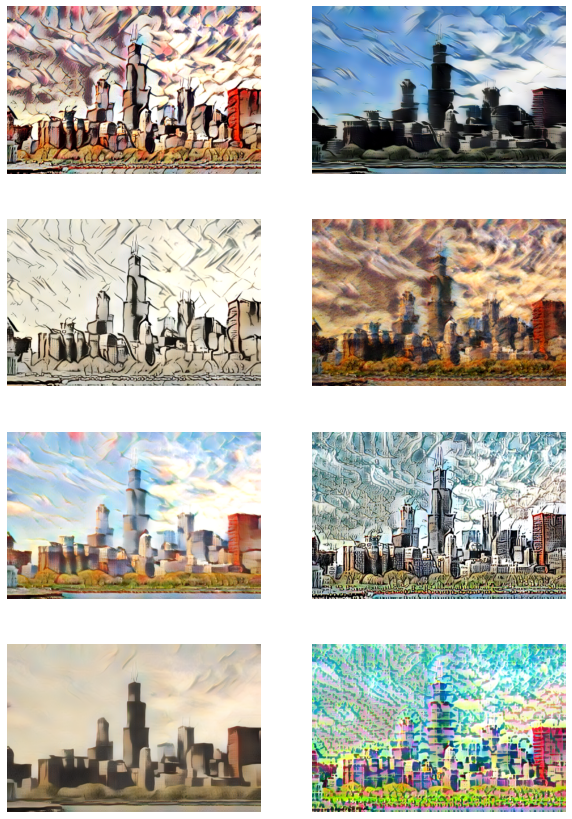

In [13]:
content_img = Image.open("test-images/content.jpg")
styles = [Image.open(f"test-images/style{i}.jpg").resize(content_img.size) for i in range(1,9)]

plt.imshow(content_img)
plt.axis(False)
plt.show()

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
ax = ax.flatten()

for axis, style in zip(ax, styles):
    content, style = T(content_img), T(style)
    content, style = content.unsqueeze(0), style.unsqueeze(0)

    content_enc, style_enc = enc(content)[-1], enc(style)[-1]
    content_realigned = AdaIN_realign(style_enc, content_enc)
    pred_img = dec(content_realigned)

    predicted_img = to_pil(pred_img[0].clip(0,1))
    axis.imshow(predicted_img)
    axis.axis(False)